In [1]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('/content/Business_Management_Dataset (1)_final_v4.csv')

print('Data basic information:')
df.info()

# Check the number of rows and columns in the dataset
rows, columns = df.shape

if rows < 100 and columns < 20:
    # For short - form data (less than 100 rows and less than 20 columns), view all data information
    print('Data all content information:')
    print(df.to_csv(sep='\t', na_rep='nan'))
else:
    # For long - form data, view data first few rows information
    print('Data first few rows content information:')
    print(df.head().to_csv(sep='\t', na_rep='nan'))

# Calculate descriptive statistics and round to two decimal places
result = df[['Employee_Satisfaction', 'Annual_Sales']].describe().round(2)
print('Descriptive statistics：')
print(result)

# Calculate the Pearson correlation coefficient and p - value
corr, p_value = pearsonr(df['Employee_Satisfaction'], df['Annual_Sales'])

# Round the results to two decimal places
corr = round(corr, 2)
p_value = round(p_value, 2)

print(f'\nThe Pearson correlation coefficient between employee satisfaction and annual sales is: {corr}')
print(f'P - value is: {p_value}')

Data basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16658 entries, 0 to 16657
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             16658 non-null  int64  
 1   Employee_Satisfaction  16658 non-null  float64
 2   Employee_Turnover      16658 non-null  float64
 3   Training_Hours         16658 non-null  float64
 4   Productivity           16658 non-null  float64
 5   Annual_Sales           16658 non-null  float64
 6   Market_Share           16658 non-null  float64
 7   Department             16658 non-null  object 
 8   Region                 16658 non-null  object 
 9   Company_Type           16658 non-null  object 
 10  Leadership_Style       16658 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Data first few rows content information:
	Unnamed: 0	Employee_Satisfaction	Employee_Turnover	Training_Hours	Productivity	Annual_S

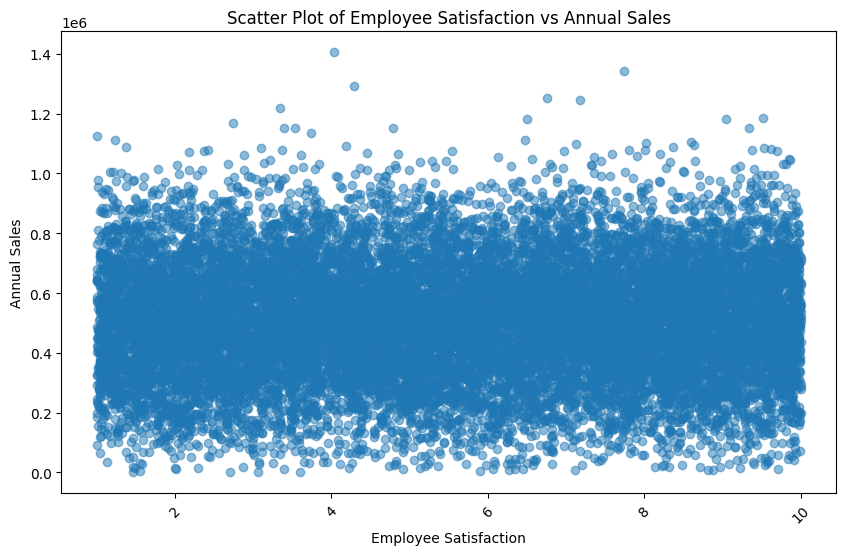

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Business_Management_Dataset (1)_final_v4.csv')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Employee_Satisfaction'], df['Annual_Sales'], alpha=0.5)

# Set plot title and axis labels
plt.title('Scatter Plot of Employee Satisfaction vs Annual Sales')
plt.xlabel('Employee Satisfaction')
plt.xticks(rotation=45)
plt.ylabel('Annual Sales')

# Display the plot
plt.show()


In [3]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
try:
    df = pd.read_csv('/content/Business_Management_Dataset (1)_final_v4.csv')
except FileNotFoundError:
    print("The specified file was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

# Select relevant columns
columns = ['Training_Hours', 'Productivity']

# Calculate descriptive statistics and round to 2 decimal places
desc_stats = df[columns].describe().round(2)
print("Descriptive statistics:")
print(desc_stats)

# Calculate Pearson correlation coefficient and p - value
try:
    correlation, p_value = pearsonr(df['Training_Hours'], df['Productivity'])
    # Round results to 2 decimal places
    correlation = round(correlation, 2)
    p_value = round(p_value, 2)
    print(f"\nThe Pearson correlation coefficient between training hours and productivity is: {correlation}")
    print(f"P - value is: {p_value}")
except KeyError:
    print("One or both of the required columns are missing in the dataset.")
except Exception as e:
    print(f"An error occurred while calculating correlation: {e}")


Descriptive statistics:
       Training_Hours  Productivity
count        16658.00      16658.00
mean            40.10         74.23
std             14.85         15.89
min              0.00          2.68
25%             29.81         63.74
50%             40.16         75.84
75%             50.29         86.72
max            101.14        100.00

The Pearson correlation coefficient between training hours and productivity is: -0.01
P - value is: 0.27


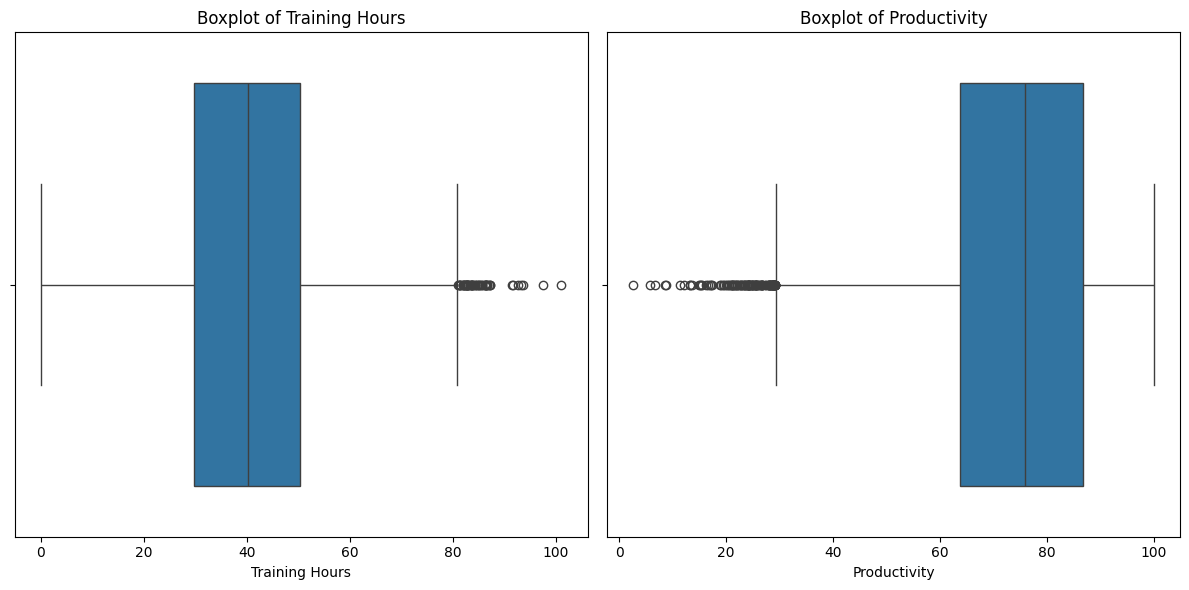

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('/content/Business_Management_Dataset (1)_final_v4.csv')
except FileNotFoundError:
    print("The specified file was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a boxplot for Training_Hours
sns.boxplot(data=df, x='Training_Hours', ax=axes[0])
axes[0].set_title('Boxplot of Training Hours')
axes[0].set_xlabel('Training Hours')

# Create a boxplot for Productivity
sns.boxplot(data=df, x='Productivity', ax=axes[1])
axes[1].set_title('Boxplot of Productivity')
axes[1].set_xlabel('Productivity')

# Display the plot
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Try to load the dataset
try:
    df = pd.read_csv('/content/Business_Management_Dataset (1)_final_v4.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

# Provide descriptive statistics for turnover rates
turnover_stats = df['Employee_Turnover'].describe().round(2)
print("Descriptive statistics for turnover rates:")
print(turnover_stats)

# Provide descriptive statistics grouped by leadership styles
grouped_stats = df.groupby('Leadership_Style')['Employee_Turnover'].describe().round(2)
print("\nDescriptive statistics for turnover rates grouped by leadership styles:")
print(grouped_stats)

# Perform one - way ANOVA
try:
    model = ols('Employee_Turnover ~ C(Leadership_Style)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\nANOVA table:")
    print(anova_table)
except Exception as e:
    print(f"An error occurred during the ANOVA analysis: {e}")


Descriptive statistics for turnover rates:
count    16658.00
mean        15.00
std          8.69
min          0.01
25%          7.47
50%         15.11
75%         22.55
max         30.00
Name: Employee_Turnover, dtype: float64

Descriptive statistics for turnover rates grouped by leadership styles:
                   count   mean   std   min   25%    50%    75%    max
Leadership_Style                                                      
Autocratic        4194.0  14.84  8.70  0.01  7.24  14.84  22.37  30.00
Laissez-faire     4133.0  15.05  8.72  0.01  7.59  15.11  22.77  30.00
Transactional     4115.0  15.00  8.62  0.02  7.76  15.14  22.28  29.98
Transformational  4216.0  15.09  8.71  0.01  7.43  15.36  22.74  29.97

ANOVA table:
                           sum_sq       df         F    PR(>F)
C(Leadership_Style)  1.594559e+02      3.0  0.704084  0.549452
Residual             1.257225e+06  16654.0       NaN       NaN


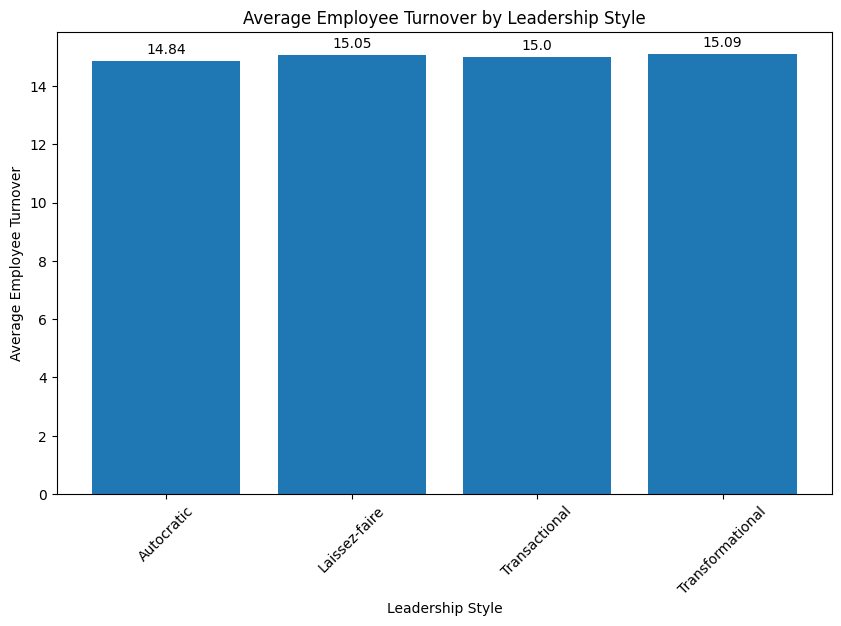

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('/content/Business_Management_Dataset (1)_final_v4.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()

# Calculate the average turnover rate for each leadership style
avg_turnover = df.groupby('Leadership_Style')['Employee_Turnover'].mean().round(2)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_turnover.index, avg_turnover.values)
plt.xlabel('Leadership Style')
plt.xticks(rotation=45)
plt.ylabel('Average Employee Turnover')
plt.title('Average Employee Turnover by Leadership Style')

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()
